## 1: Business Understanding

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Airbnb has been super popular among travalers for vacation rentals and tourism activates, due to its sharing economy charactor.

Diving into Seattle Airbnb Data from Kagga, I am very interested to explore the below questions.

- 1.When is the busy season in seattle that is harder to book and what is the cheapest time of the year to travel to seattle?
- 2.Is there any organizations or big host that dominate the airbnb market?
- 3.Is there any correlation between price and customer experience, which price range have the best satisfaction?

## 2: Data Understanding

In [3]:
#Import library
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics


In [4]:
#read dataset
rootpath = "C:\\Users\\USWangCh1\\Downloads\\Project1"
calendar = pd.read_csv(rootpath + "\\calendar.csv")
listings = pd.read_csv(rootpath + "\\listings.csv")
reviews = pd.read_csv(rootpath + "\\reviews.csv")

In [5]:
#look into data content
print("calendar data shape:", calendar.shape)
print("listing data shape:", listings.shape)
print("review data shape:", reviews.shape)

calendar data shape: (1393570, 4)
listing data shape: (3818, 92)
review data shape: (84849, 6)


In [6]:
calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


by looking at the data,"available" colume is binary,and if t then price is available

In [7]:
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [17]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


 next I will join datasets together for my analysis use.

## 3.Data preperation

In [30]:
# data clean for calendar data
#change price type and remove $

calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

#available means someone booked the listing
calendar['available_bool'] = np.where(calendar['available']=='t', True, False)

#get month year day for the date
calendar[['year', 'month','day']] = calendar['date'].str.split('-', expand = True)


calendar.head()

,listing_id,date,available,price,available_bool,year,month,day
0,241032,2016-01-04,t,85.0,True,2016,01,04
1,241032,2016-01-05,t,85.0,True,2016,01,05
2,241032,2016-01-06,f,NaN,False,2016,01,06
3,241032,2016-01-07,f,NaN,False,2016,01,07
4,241032,2016-01-08,f,NaN,False,2016,01,08


In [29]:

#check is there missing data
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1393570 non-null  int64  
 1   date            1393570 non-null  object 
 2   available       1393570 non-null  object 
 3   price           934542 non-null   float64
 4   available_bool  1393570 non-null  bool   
 5   year            1393570 non-null  object 
 6   month           1393570 non-null  object 
 7   day             1393570 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 75.8+ MB


no much need to be done as the data does not have much missing value.

## 4. Analysis and Visualization

##### 1.When is the season that is hard to book in seattle and what is the cheapest time of the year to travel to seattle?

In [34]:
# number of available listing per month

booking_stats = calendar.groupby("month").agg({"available_bool": ['mean', 'count']}).reset_index()
booking_stats

month available_bool        
                   mean   count
0     01       0.566937  114540
1     02       0.662208  110722
2     03       0.709187  118358
3     04       0.663847  114540
4     05       0.675670  118358
5     06       0.674384  114540
6     07       0.627097  118358
7     08       0.645051  118358
8     09       0.674402  114540
9     10       0.696514  118358
10    11       0.713986  114540
11    12       0.735573  118358

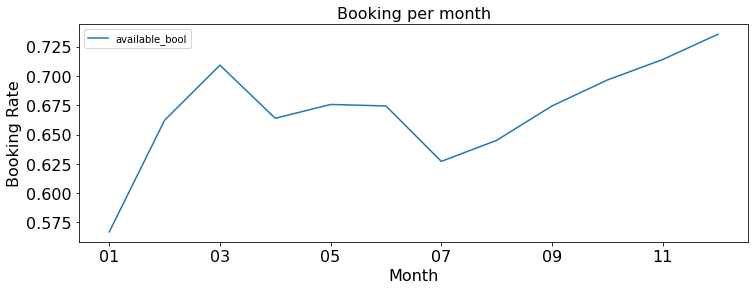

In [40]:
# plot average of the booking rate by month
booking_by_month = calendar.groupby('month', as_index=False)['available_bool'].mean()
booking_by_month.plot.line(x='month', y = 'available_bool', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Booking Rate', fontsize = 16)
plt.title("Booking per month", fontsize = 16);

it turn out that Nov and dec have the highest booking rate, which is a bit surprice for me, in Dec, almost 73% of the listing are booked

In [35]:
# stat for price per month
price_stats=calendar.groupby("month").agg({"price": ['mean', "sum"]}).reset_index()
price_stats

month       price            
                mean         sum
0     01  122.912176   7981548.0
1     02  124.293927   9113355.0
2     03  128.644488  10798161.0
3     04  135.097005  10272371.0
4     05  139.538183  11159008.0
5     06  147.473137  11391415.0
6     07  152.094150  11288732.0
7     08  150.656594  11502179.0
8     09  143.255949  11065949.0
9     10  137.031939  11296639.0
10    11  135.688738  11096625.0
11    12  137.251835  11949282.0

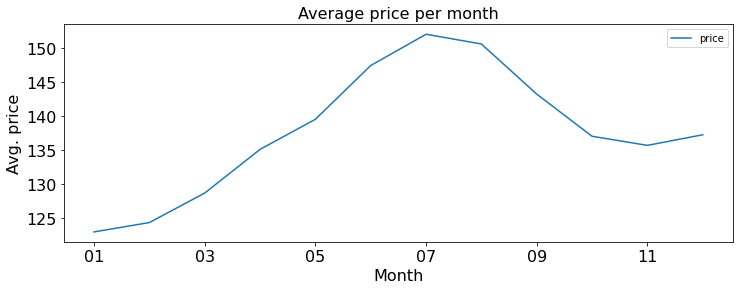

In [36]:
# plot average of the price by month
price_by_month = calendar.groupby('month', as_index=False)['price'].mean()
price_by_month.plot.line(x='month', y = 'price', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Avg. price', fontsize = 16)
plt.title("Average price per month", fontsize = 16);

from the plot above, clearly January have the lowest average price, while July and August have the highest average price.

#### 2.Is there any organizations or big host that dominate the airbnb market?

in this session I will explore the total listing number for each host_id and see if there is any host owns a great number of properties

the listing dataset contains 92 columns, first need to selet only the the columnes that I will need for below analysis

In [27]:
cols = ['id', 'host_id', 'host_neighborhood', 'host_listing_count', "host_total_listings_count", 'review_scores_rating',\
        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',\
        'review_scores_location','review_scores_value','price']
df_listings = listings.filter(cols, axis=1).drop_duplicates().rename(columns={"id": "listing_id"})
df_listings.head()

,listing_id,host_id,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,241032,956883,3.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00
1,953595,5177328,6.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00
2,3308979,16708587,2.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00
3,7421966,9851441,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100.00
4,278830,1452570,2.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00


In [24]:
host_stats = df_listings.groupby("host_id")["listing_id"].nunique().reset_index()\
.sort_values(by = 'listing_id', ascending = False).reset_index().rename(columns={"listing_id": "listing_counts"})
host_stats['listing_cumsum'] = host_stats['listing_counts'].cumsum()
total_listing = host_stats.listing_counts.sum()
host_stats['listing_cumsum_pct']=host_stats['listing_cumsum']/(host_stats.listing_counts.sum())
print(total_listing)

3818


In [28]:
host_stats.head(50)

,index,host_id,listing_counts,listing_cumsum,listing_cumsum_pct
0,1045,8534462,46,46,0.012048
1,730,4962900,39,85,0.022263
2,278,1243056,37,122,0.031954
3,131,430709,36,158,0.041383
4,539,3074414,34,192,0.050288
5,30,74305,33,225,0.058931
6,2020,26967583,21,246,0.064432
7,958,7354306,18,264,0.069146
8,2513,42537846,16,280,0.073337
9,177,658155,12,292,0.076480


In [14]:
#host_stats.listing_cumsum_pct.hist()

In [12]:
#host_stats.listing_cumsum.hist()

In [29]:
df_listings.describe()

,listing_id,host_id,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.818000e+03,3.818000e+03,3816.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000
mean,5.550111e+06,1.578556e+07,7.157757,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
std,2.962660e+06,1.458382e+07,28.628149,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259
min,3.335000e+03,4.193000e+03,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,3.258256e+06,3.275204e+06,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,6.118244e+06,1.055814e+07,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,8.035127e+06,2.590309e+07,3.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1.034016e+07,5.320861e+07,502.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

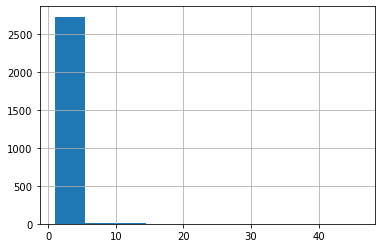

In [19]:
host_stats.listing_counts.hist()

By the histogram and the summary stats shown above, we can conclude Airbnb in Seattle have more than 75% of the host only have less than 3 listings, and only 15 host have more than 10 listing, which only make up about 9% of the total host. we do have few hosts who own a lot of listing, but they are not dominating the airbnb market.

#### 3.Is there any correlation between price and customer experience, which price range have the best satisfaction?

now let's look at the price of the listings and the review together

In [33]:
df_listings['prices'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

df_listings.head()

,listing_id,host_id,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,prices
0,241032,956883,3.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00,85.0
1,953595,5177328,6.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00,150.0
2,3308979,16708587,2.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00,975.0
3,7421966,9851441,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100.00,100.0
4,278830,1452570,2.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00,450.0


In [34]:
# Get the price dist
df_listings['prices'].quantile([0.2,0.4,0.6,0.8])

0.2     69.0
0.4     92.0
0.6    120.0
0.8    169.0
Name: prices, dtype: float64

In [36]:
# bucket the price to quantiles
bucket = [0,69,92,120,169,1000]
df_listings['price_group'] = pd.cut(df_listings['prices'], bucket)

In [39]:
#check summary for each price bucket 
summary_table = pd.DataFrame()

In [40]:
def review_score(column_name,group_by):
    '''
    This function helps you to calculate the average rating scores among certain groups.
    Input: your column name and group by which column
    Output: a panda series with the average rating scores by different groups
    '''
    summary_table['avg_'+column_name] = df_listings.groupby([group_by])[column_name].mean()

In [48]:
for columns in ['review_scores_rating',
        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
        'review_scores_location','review_scores_value']:
    review_score(columns,'price_group')

In [49]:
print(summary_table)

             avg_review_scores_rating  avg_review_scores_accuracy  \
price_group                                                         
(0, 69]                     94.154867                    9.580119   
(69, 92]                    94.568369                    9.681518   
(92, 120]                   94.320532                    9.653789   
(120, 169]                  94.631579                    9.643564   
(169, 1000]                 95.096506                    9.627288   

             avg_review_scores_cleanliness  avg_review_scores_checkin  \
price_group                                                             
(0, 69]                           9.428994                   9.772997   
(69, 92]                          9.591433                   9.817133   
(92, 120]                         9.582222                   9.796131   
(120, 169]                        9.620462                   9.750825   
(169, 1000]                       9.570715                   9.797005   

    

conclusion: from the summary above, we can see that there are no significant difference between review score on accuracy/location and cleanliness unless for cheaper price group under 69$,higher price does not results in significant higher review. 